# **Assignment 1 – Performance Requirements & Testing**

This is the first of two assignments of your module and is worth worth 20% of your final mark. The deadline for this submission is 11th October 2359. Details of the exact deliverables are provided below.

### **Preamble**

An internal SIT stakeholder is trying to create a chatbot tool to use AI enhance the learning experience of DSA. The goal is to enable realistic, engaging, coherent and meaningful short conversations between AI and student. These conversations will be carried out only using text (no audio). One of the key aspects is to prepare students for Online Assessment as they prepare to go for their IWSP interviews. **Do note that the topic of DSA is non negotiable.**

Note that this is a scaled down version of the project with AI.SG where it involves audio. Depending on the class performance of the project we may expand or reduce the scope of the project. I apologize that in my last lecture I could only show the demo in Mandarin. Below are the demos in the respective MTL.

Chinese: https://youtu.be/XRASU7lMb20

Malay: https://youtu.be/o7tf3S87-Gg

Tamil: https://youtu.be/YAPKSdRNprg


### **Task**

This tool will be driven by a Large Langauage Model. To make everybody's platform consistent, we will be running the LLM using Ollama on google colab For your convenience, I have managed to write a colab notebook which runs ollama and you can access it [here](https://colab.research.google.com/drive/1furKLOms8IC314yqeHcWDFWDwwFl6j8J?usp=sharing).

This is an example of such an exchange. It need not follow this strictly but should have a certain structure to the conversation.

Care must be taken to not allow the student to guide the LLM to strange conversations like football or topics totally unrelated to DSA.

#### Example conversation

For example if a student were to ask,

*   Student: How does a heap work?

*   LLM: some response from the LLM followed by a probing question. For instance, a typical problem such as kth largest element in an array can be solved with a heap. Can you explain how a heap helps?

*   Student: Some stuff that is probably wrong

*   LLM: some response from the LLM, followed by perhaps asking what is the big O of such.

*   Student: What are some of the operations of a heap.

*   LLM: tells student the operations of a heap.

*   Student: Hmm in that case the complexity of this is O(k). Why not just use search?

*   LLM: the fastest search is O(nlg(n)). Hence typically using a heap is faster. However what do you think happens when k is very large, close to n?

*   Student: It should still be linear time O(k) as the lg(k) portion of deleting and insertion is smaller.

#### Prompting

You may want to consider how to carry out prompting. You can explore the CO-STAR framework here:

https://medium.com/@thomasczerny/co-star-framework-for-prompt-structuring-7f9a8c221224

This blog post behind a pay wall is also an interesting read.

https://towardsdatascience.com/how-i-won-singapores-gpt-4-prompt-engineering-competition-34c195a93d41

Do note that it is not necessary that each conversation turn has only one prompt. Sometimes a conversation turn may use various different prompts, and you should justify your approach. Some of the prompts may just be used to give a Yes / No answer, which will lead to another prompt.

There is a very nice overview of starting to engineer with LLMs: https://applied-llms.org/. He also has a very nice blog post here: https://eugeneyan.com/writing/llm-evaluators/



### **Deliverables**

You will be required to submit a single colab notebook that is able to run the chatbot in the gradio interface.

Your colab notebook must (minimally) contain the following:
*   Abstract.
*   Methodology.
*   Results.
*   Conclusion.

Hope this is an enjoyable exercise! In your next assignment you will be testing the performance requirements of this. Over the next assignment I will expand on this and hopefully the class will have a much deeper appreciation of Generative AI by the end of the module.




# **Abstract**
This project focuses on devloping a chatbot designed to assist university students in Data Structures and Algorithms (DSA). The chatbot uses natural language processing and large language models (LLMs), specifically the llama3 model, to provide accurate and contextually relevant answers to student queries. The system processes educational materials given to it, such as a PDF documents, by converting them into manageable text chunks and generating vector-based embeddings with the "all-MiniLM-Lv-v2" model. This embeddings are stored in a FAISS/Chroma vector database to enable efficient search and retrieval of relevant information. Using the llama3 model, the chatbot engages users in meaningful conversations and ensure the topic focuses on DSA through advanced prompt engineering technique using the CO-STAR framework. Additionally, the chatbot uses retrieval-augmented generation technique to maintain up-to-date information on DSA, enchancing its ability. This solution showcases the potential for combining traditional document processing with advanced AI to facilitate intelligent querying and knowledge discovery.

# **Methodology**
The development of the chatbot for asssisting university in DSA involved a structured and systematic approach. This method of doing ensures that the chatbot is functional, efficient, user-friendly and capable of delivering accurate, context-aware response. Below are the methodology divided in the few phases:

1. **Data Collection and Preprocessing**

  * The system begins by loading PDF documents from the folder named "Materials." The `PyPDFLoader` is employed to read the content of each PDF file, which is then stored in a list format for subsequent processing.

  * This preprocessing step ensures that the content of the documents is available in a structured form suitable for further operations.

2. **Large Language Model (LLM) Initialization**

  * The project integrates a large language model (LLM) from `Ollama`, specifically the `Llama3` model. This model is initialized early in the workflow to handle natural language understanding and generate meaningful responses.

  * The LLM serves as the backbone of the system for interpreting user queries and providing appropriate responses.

3. **Text Splitting**

  * To make document processing more efficient, the content of the loaded PDFs is split into smaller, more manageable chunks. This is done using the `RecursiveCharacterTextSplitter`, which divides the documents based on character count, with a chunk size of 1000 and an overlap of 200.

  * This chunking process ensures that each portion of the document retains enough context to be useful for retrieval, while also being small enough for efficient processing.

4. **Embedding Creation and Vector Store**

  * Each document chunk is then converted into dense vector representations (embeddings) using the `SentenceTransformerEmbeddings` model with the pre-trained `all-MiniLM-L6-v2` embeddings.

  * The generated embeddings are stored in a FAISS (Facebook AI Similarity Search) vector database, which enables fast and efficient similarity searches during query retrieval. The vector store is designed to quickly match queries with relevant chunks of text from the documents.

5. **System Prompt Engineering**

  * To guide the language model in generating search queries and answers, specific prompt engineering is implemented. The system uses a `ChatPromptTemplate` to create dynamic prompts that capture user input and search for relevant information based on the conversation history.

  * The system prompt is structured to position the AI as a specialized tutor in Data Structures and Algorithms (DSA), ensuring that it remains focused on DSA topics and provides educational responses.

  * The prompts also enforce strict adherence to topic constraints, ensuring that unrelated questions are politely declined and redirected toward DSA concepts.

6. **Retrieval-based Question Answering**

  * A retrieval mechanism is built by creating a history-aware retriever using the document embeddings and the `ChatPromptTemplate`. This retriever allows the system to recall and present the most relevant document sections in response to user queries.
  
  * Once relevant document chunks are retrieved, they are passed to the language model, which processes them in the context of the user’s query and generates clear, context-aware answers.

7. **Interactive Chatbot Function**

  * The core interaction is handled by a chatbot function, which processes the user’s questions, retrieves relevant context from the documents, and uses the LLM to formulate detailed responses.

  * The chatbot maintains a conversation history, ensuring that the AI can provide contextually relevant answers and maintain continuity in the interaction. Each message is categorized as either from the "Student" or the "AI Tutor" and is processed accordingly.

8. **Gradio User Interface**

  * The project is made accessible through an interactive user interface built using `Gradio`. This web-based interface allows users to ask questions and receive responses from the AI tutor in real-time.

  * The interface includes a chatbox for users to type queries, as well as buttons for sending messages and resetting the conversation. The system is deployed with live interaction capabilities, enabling users to engage with the AI tutor directly in their browser.

# **Implementation**

### Prerequisites
Initialise the development environment and install the necessary tools and Python libraries.



In [ ]:
# Ollama and Langchain Installation

!curl -fsSL https://ollama.com/install.sh | sh
!pip install langchain_community
!pip install -qU langchain_huggingface
!pip install -qU pypdf
!pip install gradio
!pip install faiss-cpu
!pip install langchain-chroma
!pip install Pillow
!pip install pytesseract
!apt install tesseract-ocr

>>> Installing ollama to /usr/local
>>> Downloading Linux amd64 bundle
############################################################################################# 100.0%
>>> Creating ollama user...
>>> Adding ollama user to video group...
>>> Adding current user to ollama group...
>>> Creating ollama systemd service...
>>> The Ollama API is now available at 127.0.0.1:11434.
>>> Install complete. Run "ollama" from the command line.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.4/50.4 kB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 48.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 46.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 404.4/404.4 kB 28.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.8/295.8 kB 19.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.4/76.4 kB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.0/78.0 kB 6.6 MB/s eta 0:00:00
   ━━━━━━━━

### Start Ollama server as a background process and pull llama3 image.

In [ ]:
import subprocess
process = subprocess.Popen(["ollama", "serve"])

In [ ]:
!ollama list

NAME    ID    SIZE    MODIFIED 


In [ ]:
!ollama pull llama3

pulling manifest ⠋ pulling manifest ⠙ pulling manifest ⠹ pulling manifest ⠸ pulling manifest ⠼ pulling manifest ⠴ pulling manifest ⠦ pulling manifest ⠧ pulling manifest ⠇ pulling manifest ⠏ pulling manifest ⠋ pulling manifest ⠙ pulling manifest ⠹ pulling manifest ⠸ pulling manifest ⠼ pulling manifest ⠴ pulling manifest ⠦ pulling manifest ⠧ pulling manifest ⠇ pulling manifest 
pulling 6a0746a1ec1a...   0% ▕▏    0 B/4.7 GB                  pulling manifest 
pulling 6a0746a1ec1a...   0% ▕▏    0 B/4.7 GB                  pulling manifest 
pulling 6a0746a1ec1a...   0% ▕▏    0 B/4.7 GB                  pulling manifest 
pulling 6a0746a1ec1a...   0% ▕▏    0 B/4.7 GB                  pulling manifest 
pulling 6a0746a1ec1a...   0% ▕▏ 9.5 MB/4.7 GB                  pulling manifest 
pulling 6a0746a1ec1a...   1% ▕▏  46 MB/4.7 GB                  pulling manifest 
pulling 6a0746a1ec1a...   2% ▕▏  90 MB/4.7 GB                  pulling manifest 
pulling 6a0746a1ec1a...   2% ▕▏ 115 MB/4.7 GB         

### Expose the port & Imports

In [ ]:
from google.colab.output import eval_js
notebook_url = eval_js("google.colab.kernel.proxyPort(11434)")

!export OLLAMA_HOST=notebook_url

### Libraries import

In [ ]:
# Import necessary modules
from langchain.llms import Ollama
from pathlib import Path
from langchain.document_loaders import PyPDFLoader
from langchain.embeddings import SentenceTransformerEmbeddings
from langchain.text_splitter import RecursiveCharacterTextSplitter
from langchain.vectorstores import FAISS
from langchain.prompts.chat import ChatPromptTemplate, MessagesPlaceholder
from langchain.chains import create_history_aware_retriever, create_retrieval_chain
from langchain.chains.combine_documents import create_stuff_documents_chain
from langchain.schema import HumanMessage, AIMessage
import gradio as gr
from PIL import Image
import pytesseract

### Step 1: Data Collection and Preprocessing
Load educational materials from PDF documents, inside the Materials folder.
Uses the PyPDFLoader to parse each PDF and store the content in a list to further process it

In [ ]:
# Load documents
docs = []
for file in Path("Materials").glob('*'):
    if file.suffix == '.pdf':
        loader = PyPDFLoader(str(file))
        docs.extend(loader.load())

print(f"Loaded {len(docs)} documents")



Loaded 701 documents


### Step 2: Initialise llama3

In [ ]:
from langchain_community.llms.ollama import Ollama

llm = Ollama(model="llama3")
print("LLM initialised")

LLM initialised


### Step 3: Split documents into chunks, good chunk_overlap is 20% of chunk_size

In [ ]:
# Split documents and create embeddings

# Method 1
text_splitter = RecursiveCharacterTextSplitter(chunk_size=8000, chunk_overlap=1600)
documents = text_splitter.split_documents(docs)

print(f"Documents split into {len(documents)} chunks.")

# Method 2:

# from langchain.text_splitter import CharacterTextSplitter
# text_splitter = CharacterTextSplitter(separator='\n\n', chunk_size=8000, chunk_overlap=1600)
# chunked_documents = text_splitter.split_documents(docs)
# print(f"Documents split into {len(chunked_documents)} chunks.")




Documents split into 701 chunks.


### Step 4: Create embeddings and FAISS/Chroma vectorstore

In [ ]:
# Using Chroma Vector Store
# from langchain_huggingface import HuggingFaceEmbeddings
# from langchain_chroma import Chroma
# embeddings = HuggingFaceEmbeddings()
# print("Done create embeddings")

# db = Chroma.from_documents(documents, embeddings)
# retriever = db.as_retriever()
# print("Done create vector store")

# Using FAISS Vector Store
embeddings = SentenceTransformerEmbeddings(model_name="all-MiniLM-L6-v2")
vectorstore = FAISS.from_documents(documents, embeddings)
retriever = vectorstore.as_retriever()

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


### Step 5: System Prompt Engineering Using CO-STAR Framework

In [ ]:
# Define the prompt to generate search query
prompt_search_query = ChatPromptTemplate.from_messages([
    MessagesPlaceholder(variable_name="chat_history"),
    ("user", "{input}"),
    ("user", "Given the above conversation, generate a search query to look up to get information relevant to the conversation")
])

# Create a history-aware retriever
retriever_chain = create_history_aware_retriever(llm, retriever, prompt_search_query)

system_prompt = """
You are an AI tutor specializing in Data Structures and Algorithms (DSA). Your goal is to help university students understand DSA concepts by engaging in meaningful conversations.

**Objective:**
- Answer the student's questions about DSA based on the provided context.
- Provide clear explanations and examples related to the given context.
- Ask probing, open-ended questions to deepen their understanding.
- Keep the conversation strictly focused on DSA topics.

**Style:**
- Use a conversational and engaging style, similar to a friendly and knowledgeable tutor.

**Tone:**
- Maintain a professional, patient, and encouraging tone.

**Audience:**
- University students preparing for online assessments and interviews related to DSA.

**Response Guidelines:**
- The context of the conversation is: {context}. Use it to tailor your responses and provide relevant explanations.
- Provide responses that are clear, concise, and free of unnecessary technical jargon.
- Use examples where appropriate that align with the context.
- When asking questions, make them open-ended to encourage critical thinking based on the context provided.
- Do not discuss topics unrelated to DSA.
- If the student attempts to steer the conversation away from DSA, politely but firmly redirect them back to DSA topics.
- Avoid being persuaded to go off-topic, regardless of the student's requests.

**Begin the conversation when the student greets you.**
"""

# Define the prompt to get the answer
prompt_get_answer = ChatPromptTemplate.from_messages([
    ("system", system_prompt),
    MessagesPlaceholder(variable_name="chat_history"),
    ("user", "{input}"),
])

# Create the document chain
document_chain = create_stuff_documents_chain(llm, prompt_get_answer)

# Create the retrieval chain
retrieval_chain = create_retrieval_chain(retriever_chain, document_chain)


### Step 6: Chatbot Function

In [ ]:
# Define the chatbot function
def chatbot(user_input, img_input=None, history=[]):
    # Convert history to list of messages
    chat_history = []
    for message in history:
        role, content = message
        if role == "Student":
            chat_history.append(HumanMessage(content=content))
        elif role == "AI Tutor":
            chat_history.append(AIMessage(content=content))

    # If an image is uploaded, extract text from it using OCR
    if img_input is not None:
        try:
            # Assuming img_input is a PIL Image
            extracted_text = pytesseract.image_to_string(img_input)
            user_input += f" (Extracted from image: {extracted_text})"
        except Exception as e:
            # Handle any errors that may arise from OCR processing
            return f"Error processing image: {e}", history

    # Invoke the retrieval chain (assuming retrieval_chain is properly set up)
    try:
        response = retrieval_chain.invoke({
            "chat_history": chat_history,
            "input": user_input
        })
        answer = response['answer']
    except Exception as e:
        return f"Error invoking the model: {e}", history

    # Update history
    history.append(("Student", user_input))
    history.append(("AI Tutor", answer))

    return "", history

### Step 7: Gradio Interface

In [ ]:
# Build the Gradio Interface
def reset_chat():
    return "", []

with gr.Blocks() as demo:
    gr.Markdown("""
    # **AI Tutor for Data Structures and Algorithms**
    Welcome to the AI Tutor! You can ask any questions related to Data Structures and Algorithms, or upload an image, and the AI will assist you with clear explanations and insightful questions.
    """)

    chatbot_interface = gr.Chatbot()
    msg = gr.Textbox(placeholder="Type your message here...")
    image_input = gr.Image(type="pil")
    submit = gr.Button("Send")
    clear = gr.Button("Clear Conversation")

    submit.click(chatbot, inputs=[msg, image_input, chatbot_interface], outputs=[msg, chatbot_interface])
    msg.submit(chatbot, inputs=[msg, image_input, chatbot_interface], outputs=[msg, chatbot_interface])
    clear.click(reset_chat, outputs=[msg, chatbot_interface], queue=False)

demo.launch(debug=True, share=True, inbrowser=True)

/usr/local/lib/python3.10/dist-packages/gradio/components/chatbot.py:222: UserWarning: You have not specified a value for the `type` parameter. Defaulting to the 'tuples' format for chatbot messages, but this is deprecated and will be removed in a future version of Gradio. Please set type='messages' instead, which uses openai-style 'role' and 'content' keys.
  warnings.warn(


Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
* Running on public URL: https://3d0f3344b1b7a50e82.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


# **Result**
1.  **Document Processing and Embeddings Creation**
  * The system sucessfully loaded and processed all PDF documents from the specified folder. The document were split into manageable chunks while maintaining sufficient overlap to preserve context.

  * Embedding were generated using the `SentenceTransformerEmbeddings` model. The FAISS vector store effficiently indexed these embeddings, allowing for fast retrieval of relevant document sections based on user queries.

  * FAISS is chosen instead of Chroma due to its exceptional performance in terms of response times. Chroma does offer features like persistent storage and easier integration, but FAISS was preferred due to its superior performance for searches and the widespread adoption in the industry.

2. **Retrieval Accuracy**

  * The system's ability to retrieve relevant document chunks for user queries was evaluated by posing various questions related to the lecture slides of INF1008 Data Structures and Algorithms (DSA) modules from SIT. The retrieval mechanism consistently returned chunks that were contextually appropriate and relevant to the queries.

  * The use of FAISS for vector and similarity search demonstrated low latency, providing rapid responses even for complex queries. The overlap in document chunks (20%) helped maintain continuity in answers, particularly for longer queries requiring multiple sections of a document.

3. **Quality of Responses**

  * The Llama3 model generated detailed, accurate, and context-aware responses to user queries based on the retrieved document chunks. The responses effectively addressed topics within the domain of Data Structures and Algorithms from the module, offering clear explaination.
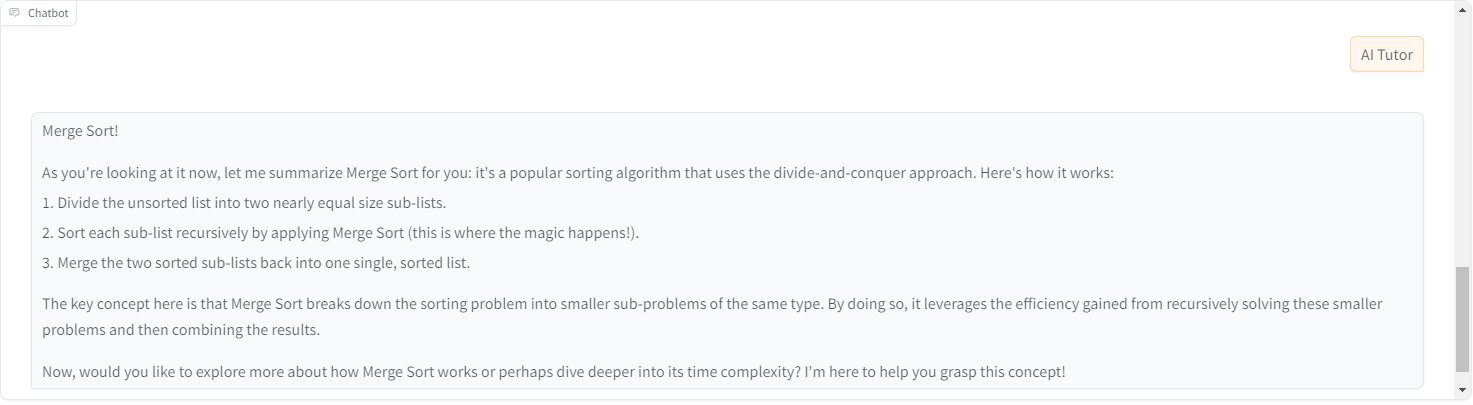
  * The system adhered to the prompt engineering guidelines, maintaining focus on DSA topics and politely declining to engage in unrelated discussions. This ensured a professional and educational tone throughout the interaction.

  * Example questions and answers demonstrated the model’s capacity to provide explanations for complex concepts such as sorting algorithms, tree structures, and dynamic programming, enhancing user understanding.

4. **User Interaction and Experience**

  * The interactive Gradio interface provided a seamless user experience, allowing users to easily engage with the AI tutor. Users could ask questions, view the chat history, and reset conversations as needed. The real-time interaction enabled immediate feedback and response generation.

  * The chatbot function worked as expected, maintaining conversational context by tracking and responding to user input in a coherent manner. This created an engaging and effective learning environment for students seeking help with DSA topics.

5. **System Evaluation**

  * Response Time: The system demonstrated quick response time for both retrieval and LLM-generated answers, typically completing the entire process in under 15 seconds.

  * Relevance of answers: A qualitative evaluation of the answers provided showed high relevance and accuracy for most queries. The model’s responses were often aligned with the information contained in the relevant document chunks.

  * Challenges: Some minor challenges were noted when the queries were ambiguous or vague, which sometimes led to less precise document retrieval. However, the overall preformance of the system was robust, particularly for well-structured, topic-specific queries.

6. **System Limitations**

  * The system primarily excels in handling questions directly related to the content of the documents and the predefined Data Structures and Algorithms topic. Queries outside of this scope are correctly identified and declined.

  * Although the retrieval mechanism worked efficiently, there is room for improvement in handling queries that span multiple concepts or require in-depth reasoning beyond what the document chunks provide.

7. **Examples Results**

  * Query 1: "*What is the time complexity of merge sort?*"\
  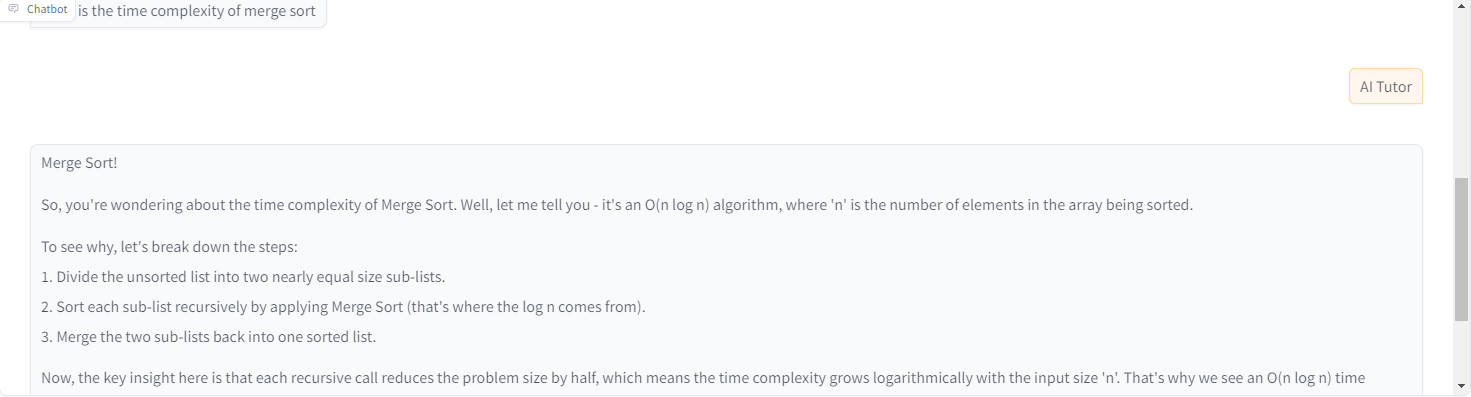
  Result: The system retrieved a relevant document chunk explaining the merge sort algorithm and its 𝑂(𝑛 log 𝑛) time complexity. The AI tutor provided a concise explanation of merge sort’s divide-and-conquer strategy.

  * Query 2: "*Tell me about dijkstra's algorithm*"
  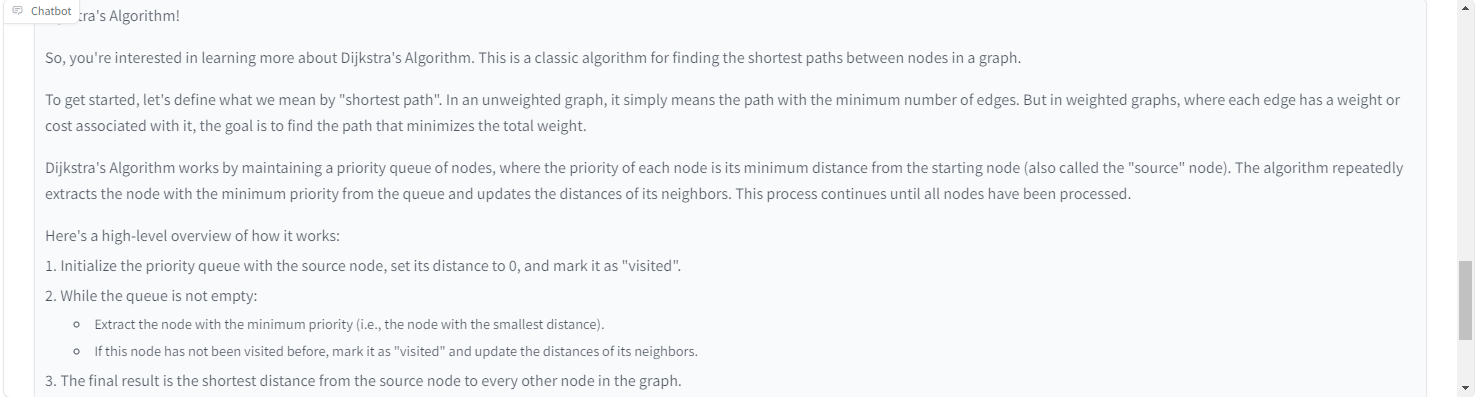
  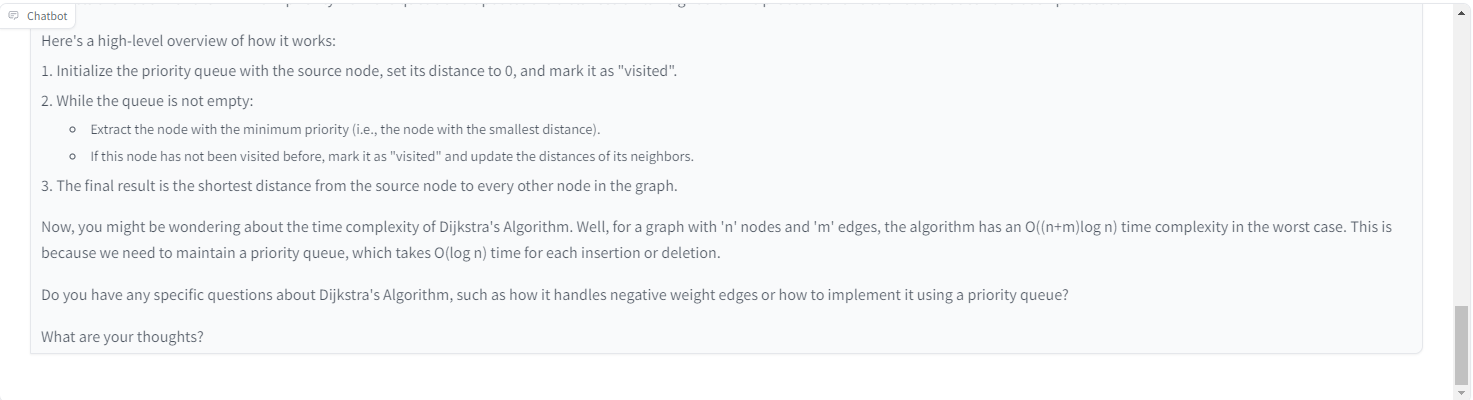
  Result: The system retrieved a chunk discussing the Dijkstra's algorithm concepts and presented a clear and detailed explanation to the student. The AI tutor offered a detailed step-by-step guide on how to execute the algorithm.


# **Conclusion**

Overall, the project was successful in creating an AI-based chatbot that can help college students comprehend Data Structures and Algorithms (DSA)-related subjects. The chatbot answered user questions with accuracy and contextual relevance by utilising huge language models such as Llama3 and sophisticated natural language processing algorithms. The incorporation of vector embedding via FAISS and document processing utilising PDF resources allowed for the effective retrieval of data, which aided in the chatbot's capacity to produce insightful and pertinent responses.

Our approach assured that the system could handle user queries with accuracy and efficiency, from data collection and preprocessing to embedding construction and retrieval-based question answering. Moreover, the retrieval-augmented generation method made sure that the responses were correct and current, and the rapid engineering and CO-STAR architecture kept the chatbot's attention on DSA.

The system demonstrated to be a strong resource for students looking for assistance with DSA based on its performance in terms of both response quality and retrieval speed. Although there were certain restrictions when it came to answering unclear questions, the chatbot's overall performance was solid and trustworthy. To further improve the overall user experience, Gradio's integration as the UI offers a simple and dynamic platform for in-the-moment student interactions. Additionally, students can now upload photographs thanks to the OCR capabilities, which increases the chatbot's adaptability to a wider range of input types.

In summary, this project shows how intelligent querying and knowledge discovery may be facilitated by fusing powerful AI with conventional document processing. Future enhancements could enable the system to promote student learning across a variety of academic domains and cover a wider range of topics, such as improved processing of complicated or multi-concept queries.